In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from ast import literal_eval

In [3]:
df_weather = pd.read_csv('data/weather.csv', index_col=0)

In [4]:
df_weather.head()

,date,weather,weather_l,region_ids,region_names,conditions_ids,conditions
0,2019-04-07 11:45:00,8 апреля в горах Дагестана выше 2500 м в гора...,8 апрель в гора дагестан высоко 2500 м в гора ...,"[43, 46]","['Республика Алтай', 'Республика Дагестан']",[6],['лавины']
1,2024-02-12 15:18:00,14-15 февраля в Сыктывкаре ожидается аномально...,14 - 15 февраль в сыктывкар ожидаться аномальн...,[50],['Республика Коми'],[],[]
2,2019-04-06 10:55:00,7-9 апреля в горных районах муниципального обр...,7 - 9 апрель в горный район муниципальный обра...,[22],['Краснодарский край'],[6],['лавины']
3,2024-02-12 15:18:00,14-15 февраля в Сыктывкаре ожидается аномально...,14 - 15 февраль в сыктывкар ожидаться аномальн...,[50],['Республика Коми'],[],[]
4,2019-04-06 09:30:00,7 апреля в горах Дагестана выше 2500 м 7-9 ...,7 апрель в гора дагестан высоко 2500 м 7 - 9 а...,"[42, 77, 46, 47, 22]","['Республика Адыгея', 'Чеченская Республика', ...",[6],['лавины']


In [5]:
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_weather['region_ids'] = df_weather['region_ids'].apply(literal_eval)
df_weather['conditions_ids'] = df_weather['conditions_ids'].apply(literal_eval)
df_weather['conditions'] = df_weather['conditions'].apply(literal_eval)
df_weather['region_names'] = df_weather['region_names'].apply(literal_eval)

In [6]:
df_weather_conditions = df_weather.explode(column='conditions')
df_weather_conditions.dropna(inplace=True)
df_weather_conditions.head()

,date,weather,weather_l,region_ids,region_names,conditions_ids,conditions
0,2019-04-07 11:45:00,8 апреля в горах Дагестана выше 2500 м в гора...,8 апрель в гора дагестан высоко 2500 м в гора ...,"[43, 46]","[Республика Алтай, Республика Дагестан]",[6],лавины
2,2019-04-06 10:55:00,7-9 апреля в горных районах муниципального обр...,7 - 9 апрель в горный район муниципальный обра...,[22],[Краснодарский край],[6],лавины
4,2019-04-06 09:30:00,7 апреля в горах Дагестана выше 2500 м 7-9 ...,7 апрель в гора дагестан высоко 2500 м 7 - 9 а...,"[42, 77, 46, 47, 22]","[Республика Адыгея, Чеченская Республика, Респ...",[6],лавины
5,2024-02-12 14:25:00,13 февраля в Самарской области местами ожидает...,13 февраль в самарский область место ожидаться...,[61],[Самарская область],"[10, 5]","снегопад, снежный покров"
5,2024-02-12 14:25:00,13 февраля в Самарской области местами ожидает...,13 февраль в самарский область место ожидаться...,[61],[Самарская область],"[10, 5]","гололед, изморозь"


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'лавины'),
  Text(1, 0, 'снегопад, снежный покров'),
  Text(2, 0, 'гололед, изморозь'),
  Text(3, 0, 'заморозки'),
  Text(4, 0, 'метель'),
  Text(5, 0, 'ветер'),
  Text(6, 0, 'туман, снижение видимости'),
  Text(7, 0, 'дожди, ливни'),
  Text(8, 0, 'гроза'),
  Text(9, 0, 'паводки, подтопления, наводнения'),
  Text(10, 0, 'мороз'),
  Text(11, 0, 'смерч'),
  Text(12, 0, 'сель'),
  Text(13, 0, 'вулканическая активность'),
  Text(14, 0, 'ураган'),
  Text(15, 0, 'град'),
  Text(16, 0, 'жара'),
  Text(17, 0, 'пылевая буря')])

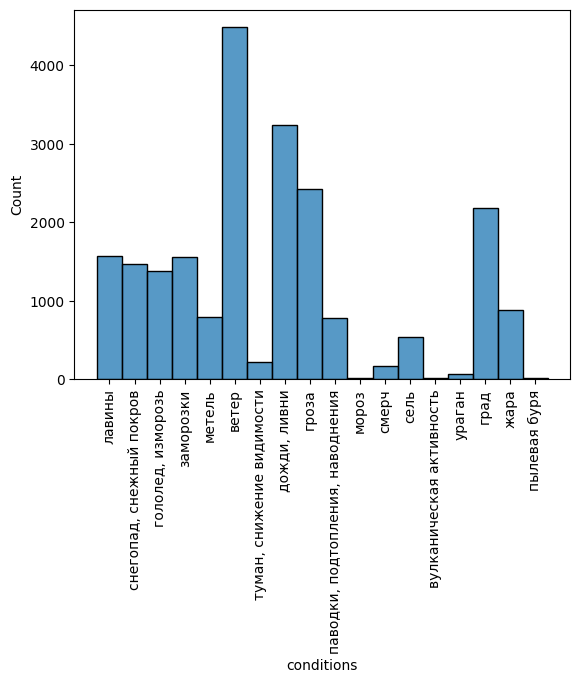

In [7]:
h = sns.histplot(df_weather_conditions['conditions'], discrete=True)
plt.xticks(rotation=90)

In [8]:
df_weather_conditions = df_weather_conditions.explode('region_ids')
df_weather_conditions.dropna(inplace=True)

In [9]:
df_weather_conditions.head()

,date,weather,weather_l,region_ids,region_names,conditions_ids,conditions
0,2019-04-07 11:45:00,8 апреля в горах Дагестана выше 2500 м в гора...,8 апрель в гора дагестан высоко 2500 м в гора ...,43,"[Республика Алтай, Республика Дагестан]",[6],лавины
0,2019-04-07 11:45:00,8 апреля в горах Дагестана выше 2500 м в гора...,8 апрель в гора дагестан высоко 2500 м в гора ...,46,"[Республика Алтай, Республика Дагестан]",[6],лавины
2,2019-04-06 10:55:00,7-9 апреля в горных районах муниципального обр...,7 - 9 апрель в горный район муниципальный обра...,22,[Краснодарский край],[6],лавины
4,2019-04-06 09:30:00,7 апреля в горах Дагестана выше 2500 м 7-9 ...,7 апрель в гора дагестан высоко 2500 м 7 - 9 а...,42,"[Республика Адыгея, Чеченская Республика, Респ...",[6],лавины
4,2019-04-06 09:30:00,7 апреля в горах Дагестана выше 2500 м 7-9 ...,7 апрель в гора дагестан высоко 2500 м 7 - 9 а...,77,"[Республика Адыгея, Чеченская Республика, Респ...",[6],лавины


Text(0.5, 9.444444444444459, 'Район')

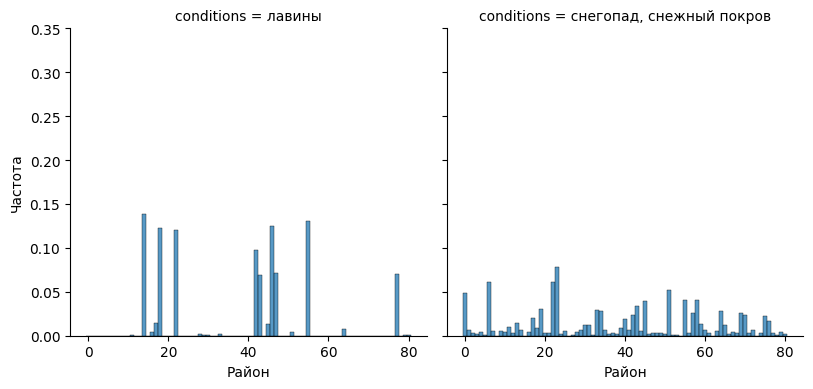

In [31]:
g = sns.FacetGrid(df_weather_conditions[['region_ids', 'conditions']] \
                  .query('(conditions == "лавины") | (conditions == "снегопад, снежный покров")'), 
                  col="conditions", col_wrap=3, height=4, ylim=(0, 0.35))
g.set_ylabels("Частота")
g.map(sns.histplot, 'region_ids', discrete=True, stat='probability')
g.axes[0].set_xlabel('Район', visible=True)
g.axes[1].set_xlabel('Район')

<AxesSubplot: xlabel='region_ids', ylabel='Count'>

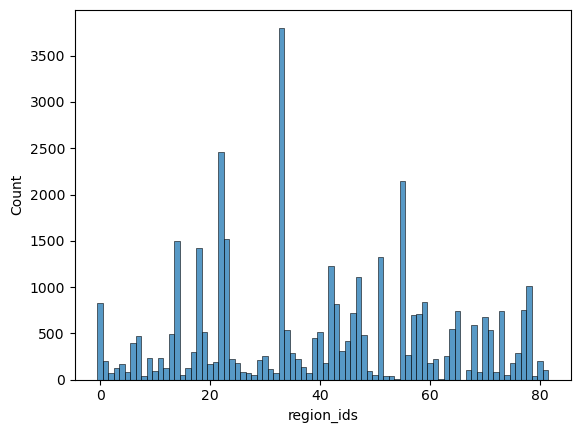

In [32]:
sns.histplot(df_weather_conditions['region_ids'], discrete=True)

In [44]:
df_weather.explode('region_names').groupby('region_names').count()['date'].sort_values(ascending=False).head(20)

region_names
Краснодарский край                     1190
Республика Северная Осетия – Алания    1088
Кабардино-Балкарская Республика         832
Красноярский край                       781
Новгородская область                    750
Карачаево-Черкесская Республика         731
Республика Адыгея                       697
Республика Дагестан                     600
Республика Ингушетия                    508
Чеченская Республика                    479
Республика Алтай                        464
Республика Крым                         448
Свердловская область                    373
Челябинская область                     351
Тюменская область                       348
Республика Хакасия                      328
Тверская область                        316
Республика Тыва                         298
Ростовская область                      297
Алтайский край                          286
Name: date, dtype: int64

[[None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None]]

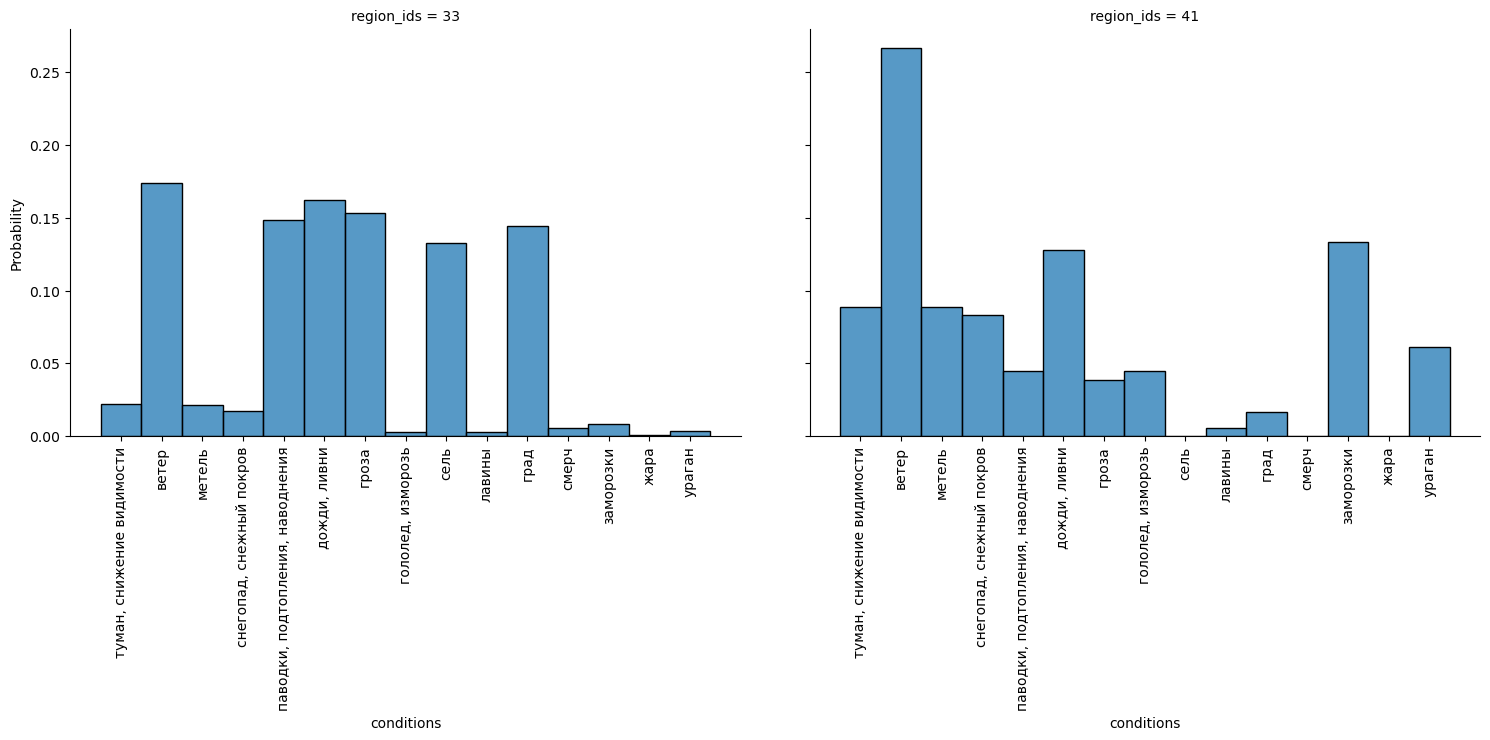

In [66]:
g = sns.FacetGrid(df_weather_conditions[(df_weather_conditions['region_ids'] == 33) | (df_weather_conditions['region_ids'] == 41)], col="region_ids", col_wrap=2, height=5, aspect=1.5)
g.map(sns.histplot, 'conditions', discrete=True, stat='probability')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]